In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# added more dependencies
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
query_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_recent_date

('2017-08-23',)

In [10]:
# declare the date one year ago
year_ago_date = dt.datetime(2016, 8, 22)


## Maximum Precipitation Analysis for each date

In [11]:
# plotting points from the maximum precipitation on any given date
# instead of plotting multiple points per date from the various stations

max_prcp_data = [Measurement.date, func.max(Measurement.prcp)]

max_prcp = session.query(*max_prcp_data).\
    filter(Measurement.date > year_ago_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Create a DataFrame
max_prcp_df = pd.DataFrame(max_prcp, columns=['date', 'max_prcp'])
max_prcp_df.set_index('date', inplace=True)
max_prcp_df

,max_prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [12]:
# Create a function to plot prcp data from DataFrame

def prcp_chart(df, tick_spacing, plot_title):
    
# plot the bar chart
    ax = df.plot(kind='bar', width=4, color='cadetblue', align = 'center')
    xticks = ax.xaxis.get_major_ticks()

# include parameters so tick marks on x axis do not appear blurred
    for i,tick in enumerate(xticks):
        if i%(tick_spacing) != 0:
            tick.label1.set_visible(False)

# parameters for plot   
    ax.get_legend().remove()
    plt.title(label=plot_title, fontsize=20, color='darkblue')
    plt.xlabel("Date")
    plt.ylabel("Precipitation \n (inches)")
    plt.tight_layout()

    return plt.show()





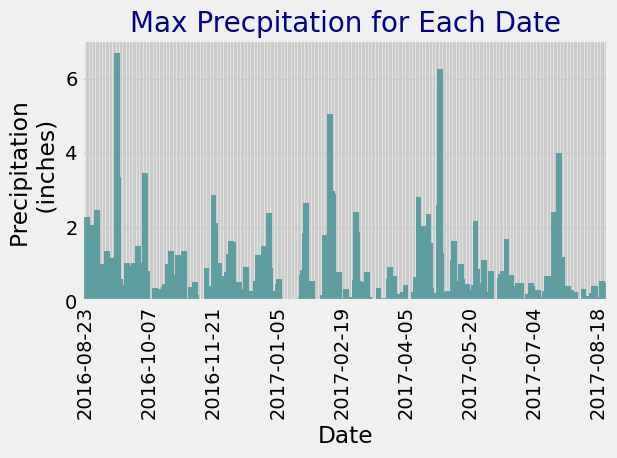

In [13]:
# plot prcp data
prcp_chart(max_prcp_df, 45, "Max Precpitation for Each Date")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Summary stats for max precpitation on each date
max_prcp_df.describe()

,max_prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


## Precipitation Analysis of All data for each date

In [15]:
# analysis of precipitation for all points for each date

all_prcp_data = [Measurement.date, Measurement.prcp]

all_prcp = session.query(*all_prcp_data).\
    filter(Measurement.date > year_ago_date).\
    order_by(Measurement.date).all()

all_prcp_df = pd.DataFrame(all_prcp, columns=['date', 'max_prcp'])
all_prcp_df.set_index('date', inplace=True)
all_prcp_df

,max_prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


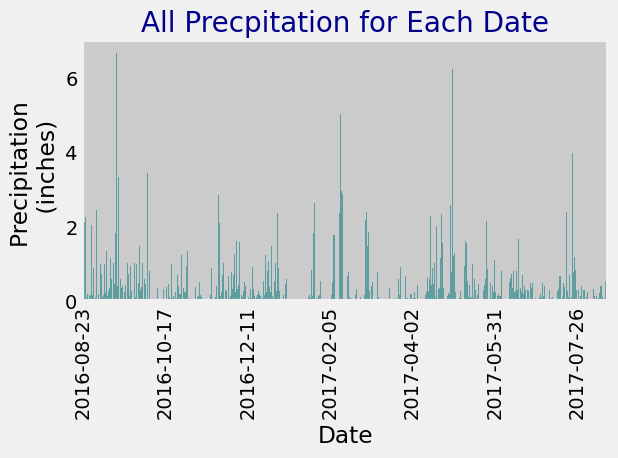

In [16]:
# plot prcp data
prcp_chart(all_prcp_df, 350, "All Precpitation for Each Date")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Summary stats for all precpitation measurements on each date
all_prcp_df.describe()

,max_prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# query all stations in Measurement
stations = session.query(Station.station).all()
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [19]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Station).distinct().count()
print(f"There are a total of {total_station_count} stations.")

There are a total of 9 stations.


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_activity = [Measurement.station, func.count(Measurement.station)]

station_counts = session.query(*station_activity).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = station_counts[0][0]

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()


print(f'The lowest temp is {lowest_temp} for station {most_active_station}.')
print(f'The highest temp is {highest_temp} for station {most_active_station}.')
print(f'The average temp is {average_temp} for station {most_active_station}.')



The lowest temp is 54.0 for station USC00519281.
The highest temp is 85.0 for station USC00519281.
The average temp is 71.66378066378067 for station USC00519281.


In [22]:
most_active_station

'USC00519281'

In [26]:
date = ('2016-08-23')

t_min = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= date).scalar()
t_min

58.0

In [27]:
date = ('2016-08-23')

t_max = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= date).scalar()
t_max

87.0

In [ ]:
date = ('2017-08-23')

t_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= date).scalar()
t_avg

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


tobs_data = [Measurement.date, Measurement.tobs]

temp_at_most_active_station = session.query(*tobs_data).\
    filter(Measurement.date > year_ago_date).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

# Create a DataFrame
temp_at_most_active_station_df = pd.DataFrame(temp_at_most_active_station)

# Construct a histogram
temp_at_most_active_station_df.plot.hist(column = 'tobs', bins=12)
plt.xlabel('Temperature')
plt.show()


# Close session

In [ ]:
# Close Session
session.close()